# Diamond Dataset Analysis and Modeling

### Making Necessary Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Loading the dataset

In [2]:
diamonds = pd.read_csv('./dataset/diamonds.csv')

### Dimensions of the dataset

In [3]:
diamonds.shape

(53940, 11)

### Data types of the features

In [4]:
diamonds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

### Getting a sense of the dataset

In [5]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds.drop(['Unnamed: 0'], axis=1, inplace=True)

### Essential Info about the Dataset

In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Looking for Missing values 

In [8]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Descriptive Statistics of Numerical Features

In [9]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
diamonds.drop(diamonds[diamonds['x'] == 0].index, inplace=True)
diamonds.drop(diamonds[diamonds['y'] == 0].index, inplace=True)
diamonds.drop(diamonds[diamonds['z'] == 0].index, inplace=True)

**x, y and z diamensions cannot be 0, so we need to remove those rows.**

In [11]:
diamonds[['x','y','z']].describe()

,x,y,z
count,53920.000000,53920.000000,53920.000000
mean,5.731627,5.734887,3.540046
std,1.119423,1.140126,0.702530
min,3.730000,3.680000,1.070000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.740000,58.900000,31.800000


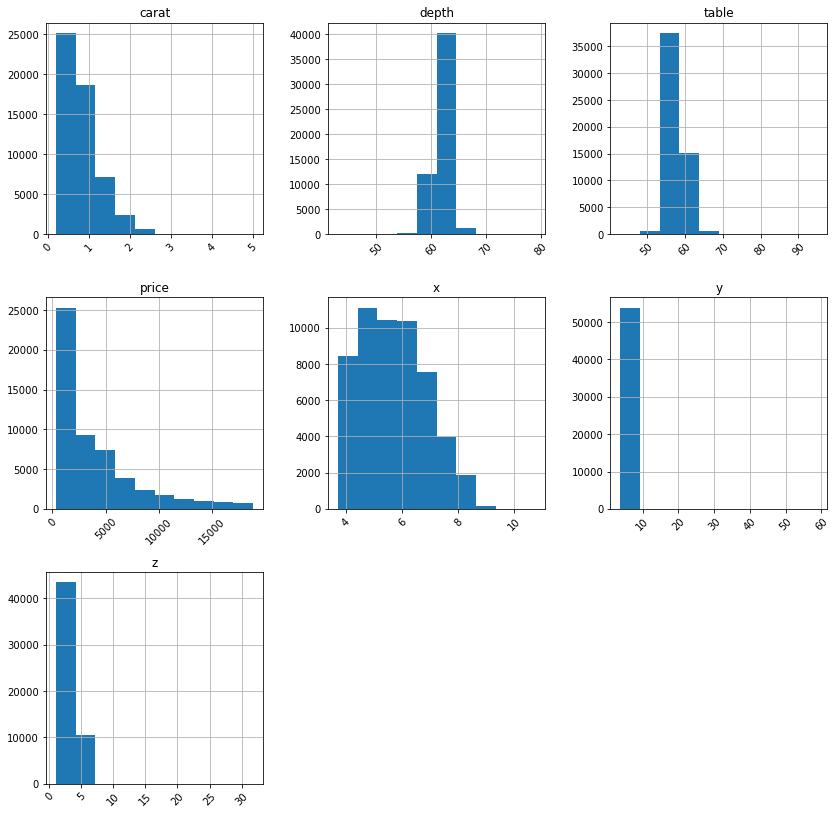

In [12]:
diamonds.hist(figsize=(14,14), xrot=45)
plt.show()

**Target variable is right skewed, also carat is right skewed**

### Descriptive Statistics of Categorical Variables

In [13]:
diamonds.describe(include='object')

,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


**G Diamonds with Ideal Cut and Slightly Included 1 clarity appear most frequently**

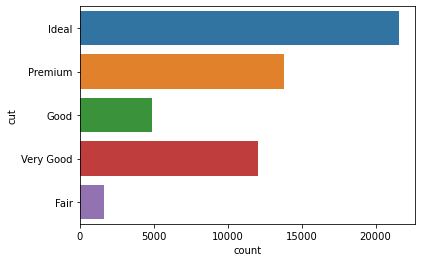

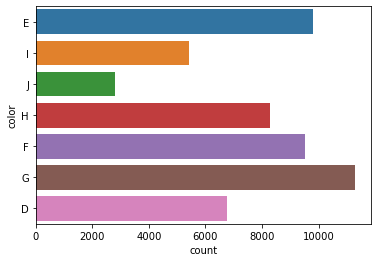

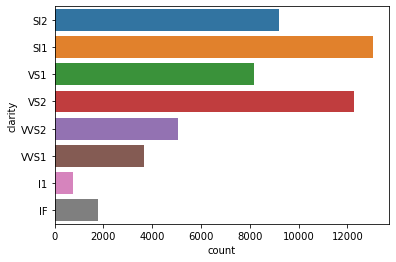

In [14]:
for column in diamonds.select_dtypes('object'):
    sns.countplot(y=column, data=diamonds)
    plt.show()

**There are no visibly sparse groups**

### Correlations between Features

In [15]:
corrs = diamonds.corr()
corrs

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


### Heatmap of Correlations Matrix

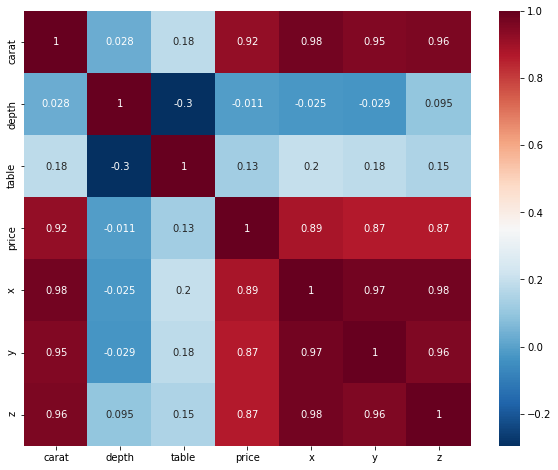

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

**Physical Features x, y and z are highly correlated to one another. Also they are highly correlated to target variable and carat**

### Looking for outliers

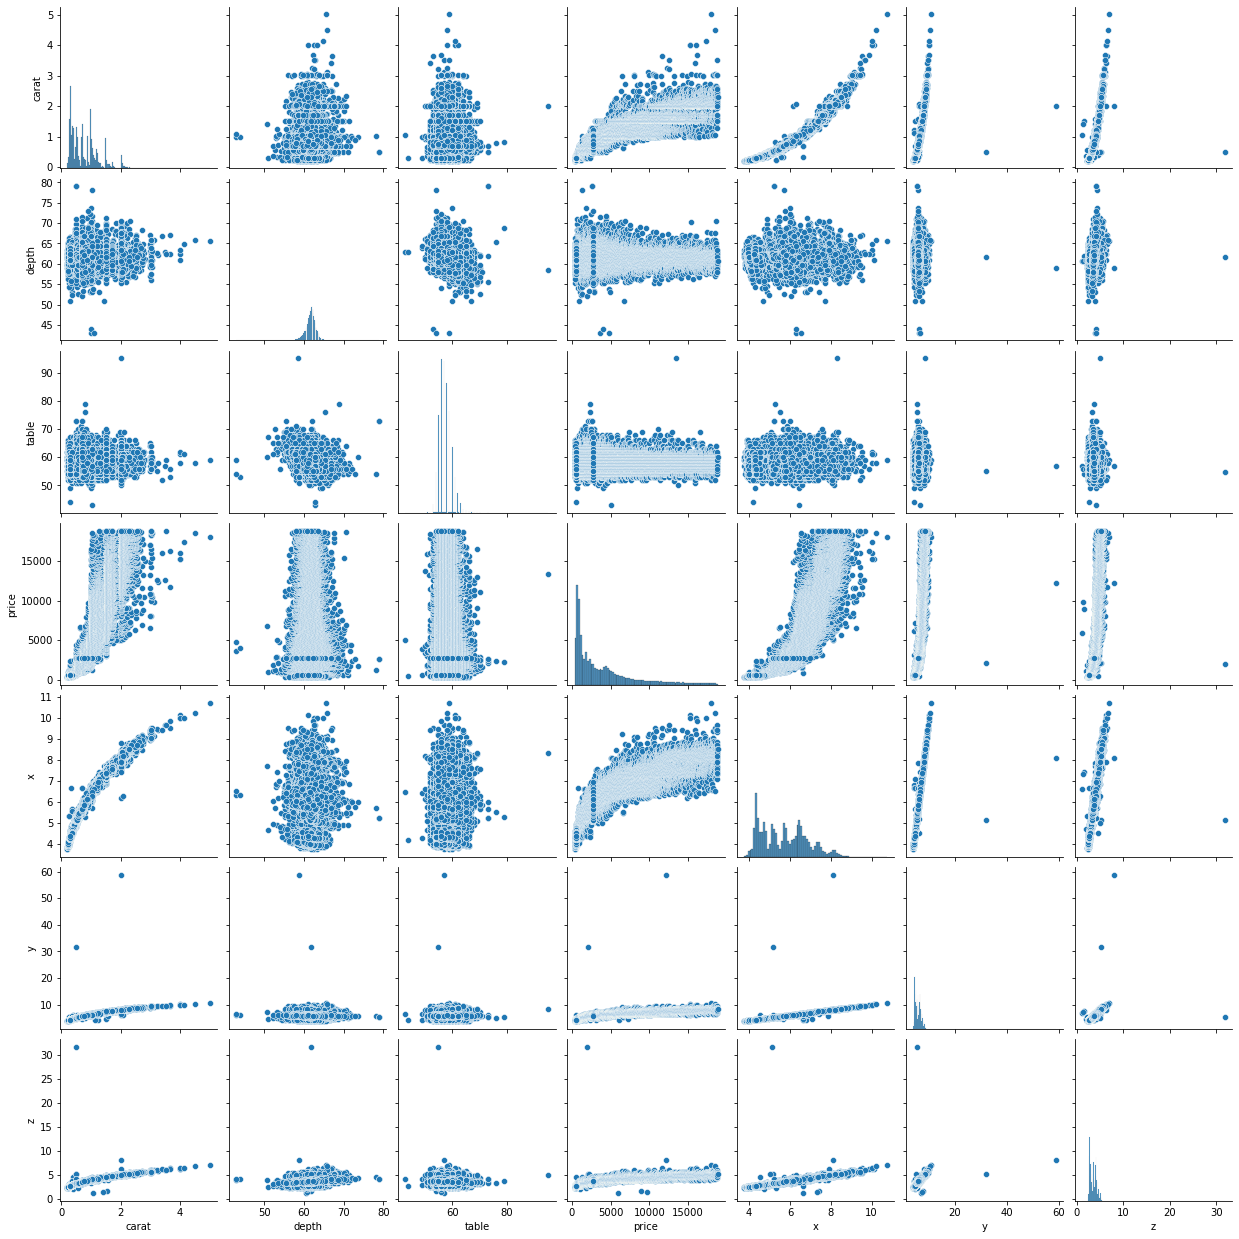

In [17]:
sns.pairplot(diamonds)

**x, y, z, table and depth have outliers**

### Removing outliers by Capping the attributes

In [18]:
outliers = []

# Indexes of 'x' that are out of range
outlying_data = diamonds[diamonds['x']>30].index
outliers.extend(outlying_data)

# Indexes of 'y' that are out of range
outlying_data = diamonds[diamonds['y']>30].index
outliers.extend(outlying_data)

# Indexes of 'z' that are out of range
outlying_data = diamonds[diamonds['z'] > 10].index
outliers.extend(outlying_data)
outlying_data = diamonds[diamonds['z'] < 2].index
outliers.extend(outlying_data)

# Indexes of 'table' that are out of range
outlying_data = diamonds[diamonds['table'] > 80].index
outliers.extend(outlying_data)
outlying_data = diamonds[diamonds['table'] < 40].index
outliers.extend(outlying_data)

# Indexes of 'depth' that are out of range
outlying_data = diamonds[diamonds['depth'] > 75].index
outliers.extend(outlying_data)
outlying_data = diamonds[diamonds['depth'] < 45].index
outliers.extend(outlying_data)

diamonds.drop(outliers, inplace=True)

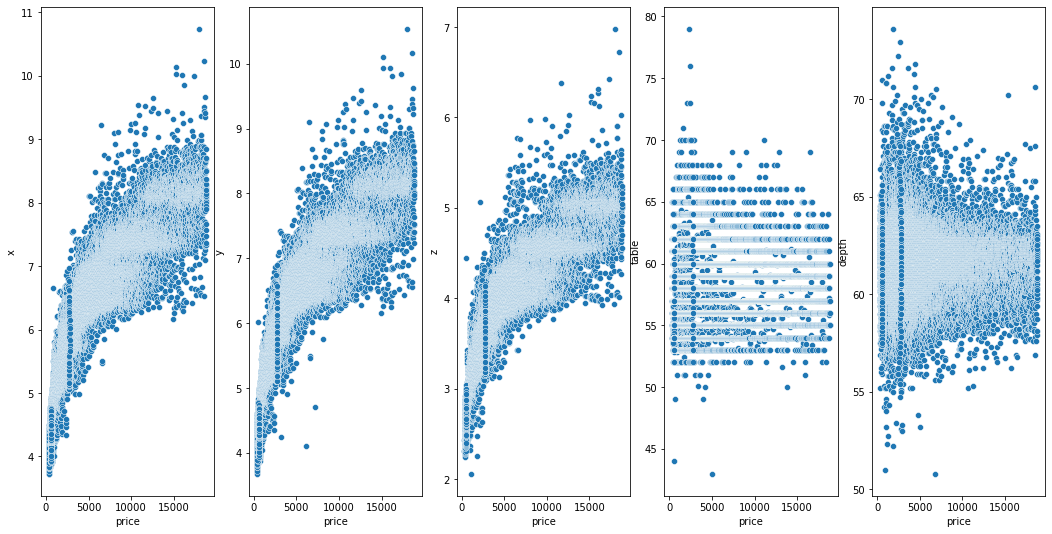

In [19]:
columns = ['x', 'y', 'z', 'table', 'depth']

fig, axs = plt.subplots(ncols = len(columns), figsize=(18, 9))
i = 0

for column in columns:
    sns.scatterplot(data = diamonds, x = diamonds.price, y = diamonds[column], ax=axs[i])
    i += 1

In [20]:
diamonds.shape

(53907, 10)

In [54]:
diamonds_temp = diamonds.copy()
cat_attrs = ['cut', 'clarity', 'color']

for i in cat_attrs:
    diamonds_temp[i+'_numeric'] = pd.factorize(diamonds_temp[i])[0]
    diamonds_temp.drop(i, axis=1, inplace=True)

In [55]:
diamonds_temp.rename(columns = {'color_numeric': 'color', 'cut_numeric': 'cut', 'clarity_numeric': 'clarity'}, inplace=True)

### Skewness in the Dataset

In [23]:
diamonds_temp.skew()

carat              1.116418
depth             -0.057712
table              0.705518
price              1.618641
x                  0.398393
y                  0.392833
z                  0.395704
cut_numeric        0.579702
clarity_numeric    0.692049
color_numeric     -0.315711
dtype: float64

In [24]:
columns = ['x','y','z','price', 'carat']

for column in columns:
    diamonds_temp[column] = np.log(diamonds_temp[column])
    print(diamonds_temp[column].skew())

0.10499081157665674
0.10330318228131366
0.10177638243076384
0.11563342556417584
0.09638542251499663


**Hence, skewnewss is brought close to 0**

In [25]:
diamonds_temp.drop(['table'], axis=1, inplace=True)

## Modeling

**We will test different Models here**

### 1. Linear Regression

In [26]:
def errors(predictions, test_data):
    mse = mean_squared_error(predictions, test_data)
    rmse = np.sqrt(mse)
    print(mse)
    print(rmse)

In [27]:
X = diamonds_temp.drop(['price'], axis=1)
y = diamonds_temp['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lin_pipeline = Pipeline([
    ('scalor', StandardScaler()),
    ('lin_reg', LinearRegression())
])

lin_pipeline.fit(X_train, y_train)

lin_predictions = lin_pipeline.predict(X_test)

errors(lin_predictions, y_test)

0.04991361373382283
0.22341354868007185


In [28]:
cross_scores = cross_val_score(lin_pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_cross_scores = np.sqrt(-cross_scores)

In [29]:
def display_scores(scores):
    print("scores:", scores)
    print("mean of scores:", scores.mean())
    print("std of scores:", scores.std())

In [30]:
display_scores(lin_cross_scores)

scores: [0.22078005 0.22620491 0.22353334 0.22831625 0.22332316 0.22539936
 0.22955384 0.22104966 0.21477146 0.22147492]
mean of scores: 0.22344069501010871
std of scores: 0.004055332122100347


In [31]:
# we want to find R2 score, we can change scoring from "neg_mean_squared_error" to "r2"
cross_scores = cross_val_score(lin_pipeline, X_train, y_train, scoring="r2", cv=10)
cross_scores = np.sqrt(cross_scores)

In [32]:
display_scores(cross_scores)

scores: [0.97601102 0.97471899 0.97581228 0.97434664 0.97593649 0.97456307
 0.97443716 0.97566517 0.97729368 0.97664667]
mean of scores: 0.9755431181863992
std of scores: 0.0009506695823851312


### 2. Polynomial Regression

In [33]:
polyF = PolynomialFeatures(include_bias=False)

pol_pipeline = Pipeline([
    ('polF', polyF),
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])


param_grid = {'polF__degree': np.arange(2,4)}

poly_reg = GridSearchCV(pol_pipeline, param_grid, cv=3, n_jobs=-1)
poly_reg.fit(X_train, y_train)
print(poly_reg.best_params_)

pol_predictions = poly_reg.predict(X_test)

errors(pol_predictions, y_test)

{'polF__degree': 2}
0.035923233328464525
0.18953425370751464


**Hence, degree = 2 is the optimum parameter value for Polynomial Features**

In [34]:
pol_cross_scores = cross_val_score(poly_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
pol_cross_scores = np.sqrt(-pol_cross_scores)

In [35]:
display_scores(pol_cross_scores)

scores: [0.18233603 0.18140437 0.18284162 0.18447485 0.18922979 0.19314737
 0.22781417 0.18531931 0.17903491 0.1870641 ]
mean of scores: 0.18926665122216674
std of scores: 0.013417098848521613


In [36]:
pol_cross_scores = cross_val_score(poly_reg, X_train, y_train, cv=10, scoring="r2")
pol_cross_scores = np.sqrt(pol_cross_scores)

In [37]:
display_scores(pol_cross_scores)

scores: [0.98370141 0.98381585 0.98388278 0.98332854 0.98278257 0.98138604
 0.97482813 0.98295922 0.98427691 0.98339649]
mean of scores: 0.9824357930450672
std of scores: 0.002647311091709989


### 3. Decision Tree

In [38]:
rf_pipeline = Pipeline([
    ('scalor', StandardScaler()),
    ('rf_reg', RandomForestRegressor())
])

rf_pipeline.fit(X_train, y_train)

rf_predictions = rf_pipeline.predict(X_test)

errors(rf_predictions, y_test)

0.009676618319164203
0.09836980389918547


In [39]:
rf_cross_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
rf_cross_scores = np.sqrt(-rf_cross_scores)

display_scores(rf_cross_scores)

scores: [0.09721815 0.09992259 0.09820897 0.09986726 0.0932462 ]
mean of scores: 0.09769263189925495
std of scores: 0.002448027578934091


In [41]:
rf_cross_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring="r2")
rf_cross_scores = np.sqrt(rf_cross_scores)

display_scores(rf_cross_scores)

scores: [0.99534893 0.99520713 0.99532101 0.99516605 0.99583425]
mean of scores: 0.9953754721624447
std of scores: 0.0002393092997556068


### Trying out a Few Values

In [42]:
# This is the value we want to predict using our models
y_test.iloc[1]

6.259581464064923

In [43]:
lin_predicted = lin_pipeline.predict([X_test.iloc[1]])
pol_predicted = poly_reg.predict([X_test.iloc[1]])
rf_predicted = rf_pipeline.predict([X_test.iloc[1]])

In [44]:
print("Linear Regression predicts:", lin_predicted)
print("Polynomial Regression predicts:", pol_predicted)
print("Random Forest predicts:", rf_predicted)

Linear Regression predicts: [6.75238018]
Polynomial Regression predicts: [6.73548665]
Random Forest predicts: [6.27414801]


### Saving the model

In [45]:
import pickle

pickle.dump(lin_pipeline, open('lin_model.pkl','wb'))
pickle.dump(pol_pipeline, open('pol_model.pkl','wb'))
pickle.dump(rf_pipeline, open('rf_model.pkl','wb'))

In [49]:
diamonds_temp.head()

,carat,depth,price,x,y,z,cut,clarity,color
0,-1.469676,61.5,5.786897,1.373716,1.381282,0.887891,0,0,0
1,-1.560648,59.8,5.786897,1.358409,1.345472,0.837248,1,1,0
2,-1.469676,56.9,5.789960,1.398717,1.403643,0.837248,2,2,0
3,-1.237874,62.4,5.811141,1.435085,1.442202,0.966984,1,3,1
4,-1.171183,63.3,5.814131,1.467874,1.470176,1.011601,2,0,2
